In [1]:
!pip install torch

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [0]:
# hyper parameters
input_size = 13
output_size = 1
num_epochs = 5000
learning_rate = 0.01

In [0]:
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
model

LinearRegression(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

In [0]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float().view(-1, 1)
    
    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float().view(-1, 1)
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.item()

In [11]:
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

epoch 0, loss: 574.5779 val_loss: 588.3683
epoch 200, loss: 443.4456 val_loss: 468.1367
epoch 400, loss: 363.7227 val_loss: 391.4933
epoch 600, loss: 299.5193 val_loss: 327.7044
epoch 800, loss: 245.2728 val_loss: 272.2335
epoch 1000, loss: 199.2635 val_loss: 224.5537
epoch 1200, loss: 160.5728 val_loss: 184.2050
epoch 1400, loss: 128.4121 val_loss: 150.4569
epoch 1600, loss: 102.0411 val_loss: 122.5554
epoch 1800, loss: 80.7576 val_loss: 99.7958
epoch 2000, loss: 63.8942 val_loss: 81.5217
epoch 2200, loss: 50.8172 val_loss: 67.1155
epoch 2400, loss: 40.9272 val_loss: 55.9945
epoch 2600, loss: 33.6624 val_loss: 47.6104
epoch 2800, loss: 28.5031 val_loss: 41.4540
epoch 3000, loss: 24.9794 val_loss: 37.0609
epoch 3200, loss: 22.6787 val_loss: 34.0200
epoch 3400, loss: 21.2517 val_loss: 31.9793
epoch 3600, loss: 20.4170 val_loss: 30.6506
epoch 3800, loss: 19.9601 val_loss: 29.8089
epoch 4000, loss: 19.7279 val_loss: 29.2881
epoch 4200, loss: 19.6193 val_loss: 28.9720
epoch 4400, loss: 19.

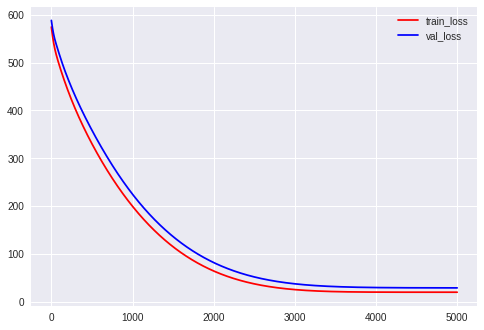

In [12]:
# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()